In [1]:
###
# pip install napari-animation
###

In [2]:
# Read the image
from skimage.io import imread
# image = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xyzt_8bit__starfish_chromosomes.tif')
# image = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xyzc_8bit__em_synapses_and_labels.tif')
image = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xyz_8bit_calibrated__mri_full_head.tif')
# image = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xyz_8bit_calibrated__organoid_nuclei.tif')
# image = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xyz_8bit_calibrated__fib_sem_crop.tif')
# image = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xyz_8bit_calibrated_labels__platy_tissues.tif')

In [3]:
# Check image type and values
import numpy as np
print(image.dtype)
print(np.min(image), np.max(image))
print(image.shape)

uint8
0 255
(129, 214, 175)


In [4]:
# Instantiate the napari viewer
import napari
viewer = napari.Viewer()

In [5]:
# View the intensity image as grayscale
viewer.add_image(image, name='image', colormap='gray')
# Napari GUI: choose a colormap according to the data type

<Image layer 'image' at 0x2872460c3a0>

In [6]:
# Napari GUI: change viewer from 2D to 3D, zoom in and out and rotate the volume
# Note: these values are optimized for xyz_8bit_calibrated__mri_full_head.tif
viewer.dims.ndisplay = 3
viewer.camera.zoom = 2
viewer.camera.angles = (0, -60, 90)

In [7]:
# Napari GUI: use rendering (and attenuation) modes
# Parameters can be changed for reproducibility
viewer.layers['image'].rendering = 'attenuated_mip'
viewer.layers['image'].attenuation = 1.

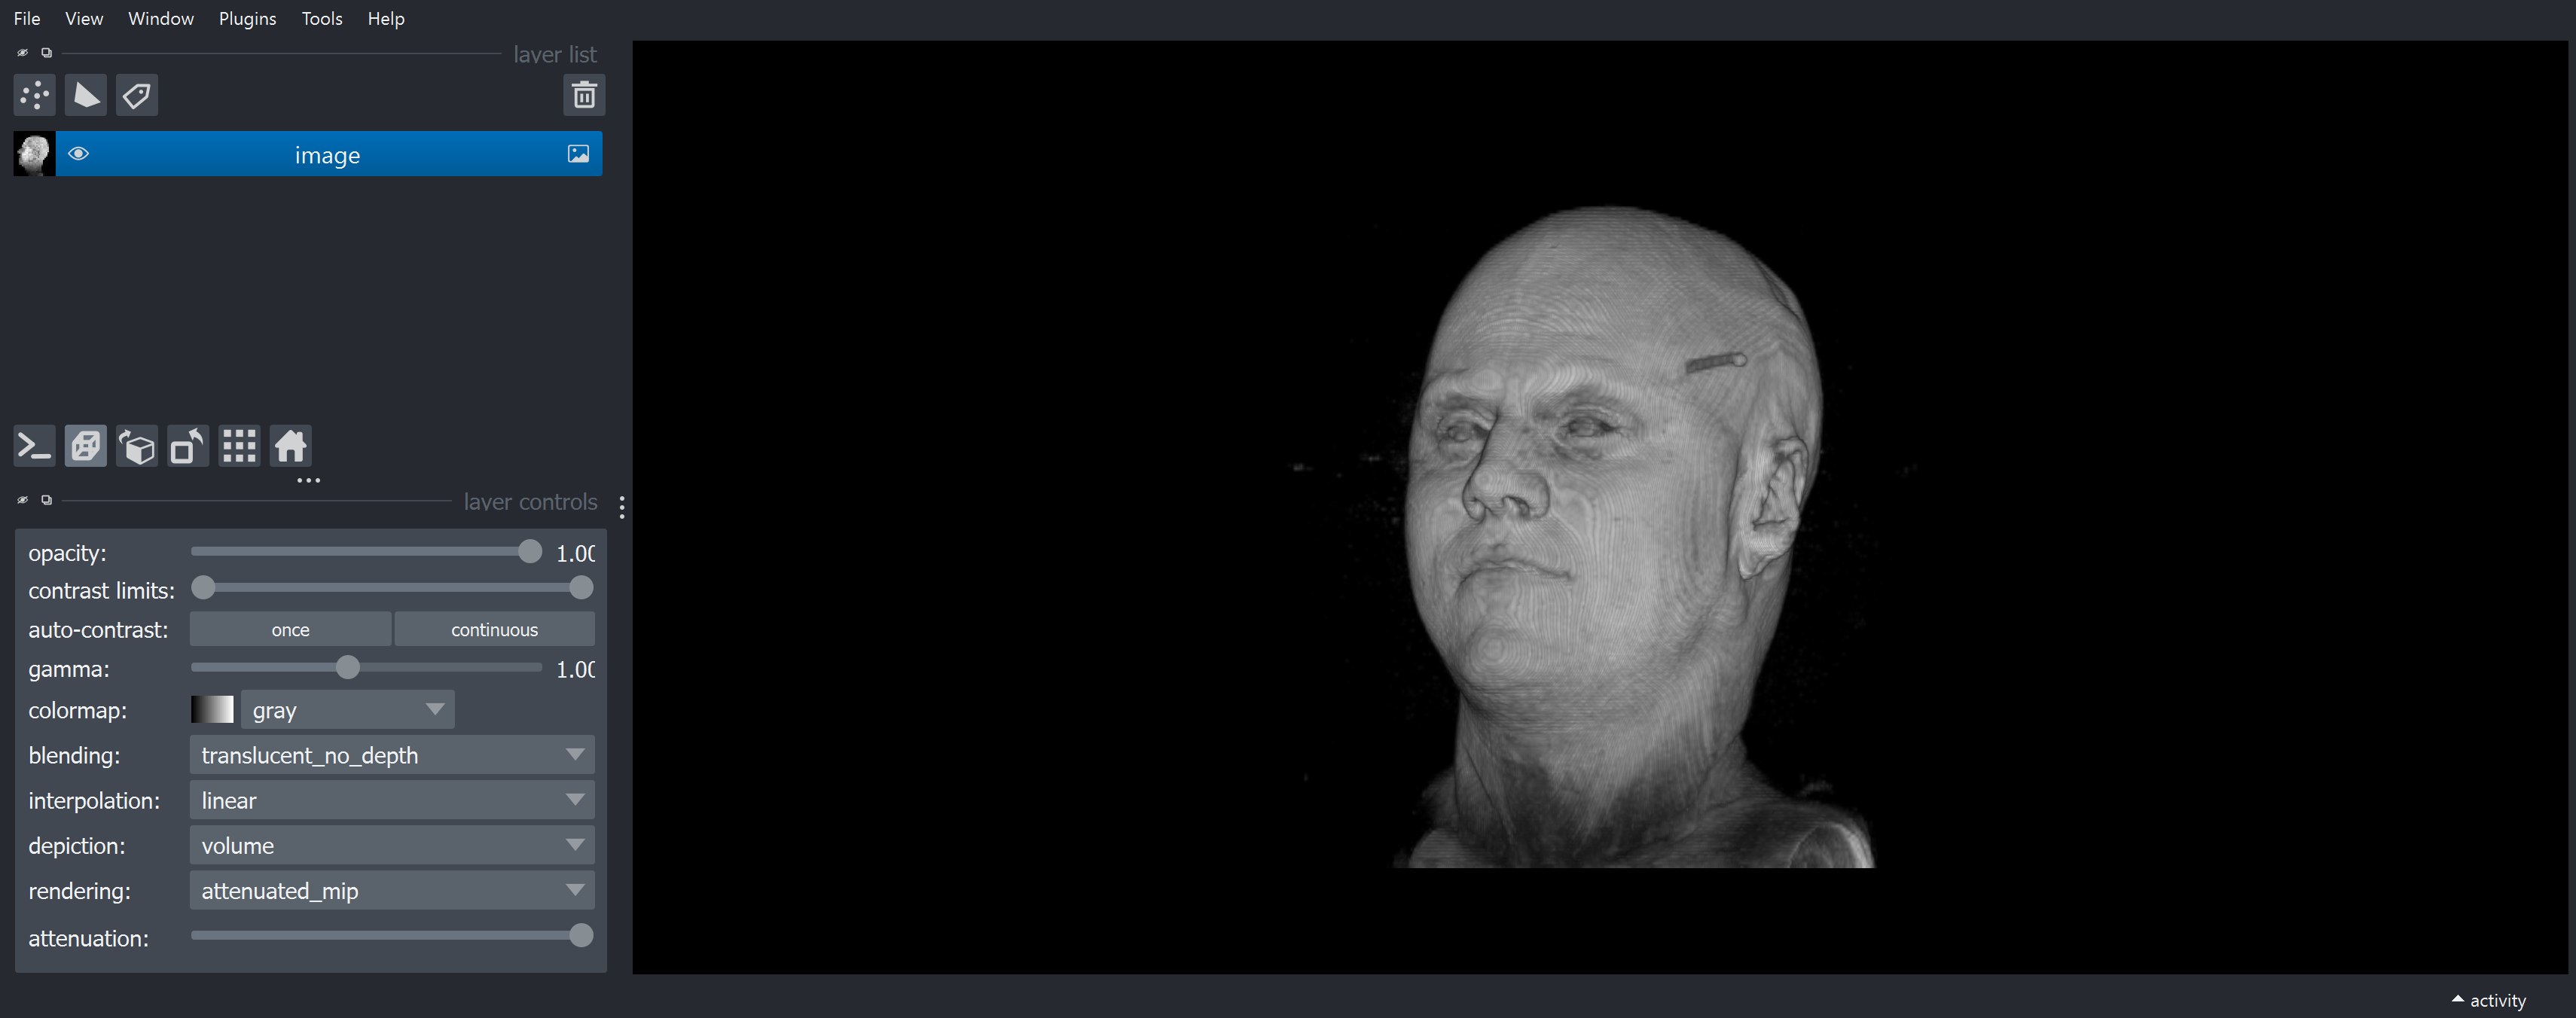

In [8]:
# Take a screenshot of the scene created
from napari.utils import nbscreenshot
nbscreenshot(viewer)

In [9]:
# Acquire the frame as numpy array and add it to the napari GUI
screenshot = viewer.screenshot()
viewer.add_image(screenshot, name='screenshot')
viewer.dims.ndisplay = 2

C:\Users\nicol\Anaconda3\envs\skimage-napari-tutorial\lib\site-packages\napari\_vispy\layers\image.py:259: UserWarning: data shape (1, 1240, 2570, 4) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(


In [11]:
# Napari GUI: realize this is a 2D RGB image and can be saved as a PNG for presentations
print(screenshot.dtype)
print(np.min(screenshot), np.max(screenshot))
print(screenshot.shape)

uint8
0 255
(1240, 2570, 4)


In [10]:
# Napari GUI: use napari-animation to create an animation of the volume